In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Stress.csv")

In [3]:
df.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


## plot the percentage of stress and not stress

In [4]:
from matplotlib import pyplot as plt

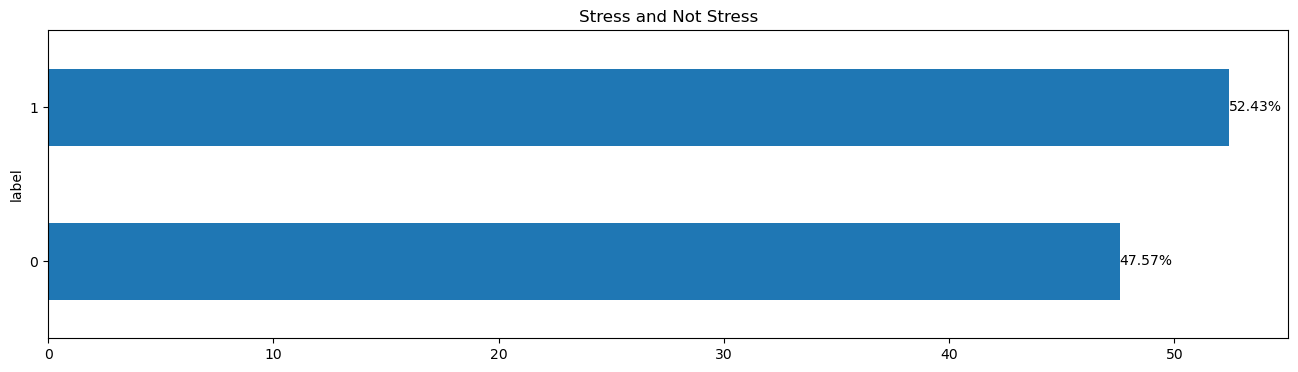

In [5]:
bar_graph= (df["label"].value_counts(normalize=True)*100).sort_values().plot(kind='barh',figsize=(16 , 4),title='Stress and Not Stress')
for a in bar_graph.containers:
    plt.bar_label(a,fmt='%.2f%%')
plt.show()

In [6]:
df["label"].value_counts()

label
1    1488
0    1350
Name: count, dtype: int64

# clean the data

In [7]:
def show(data):
    for index , content in enumerate(data) :
        
        if(index <= 5) :
            print(content)
        else :
            break

## 1.clean the text

In [8]:
import re
import string

In [9]:
def wordopt(text) :
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [10]:
df["text"] = df["text"].apply(wordopt)

In [11]:
show(df["text"])

he said he had not felt that way before  suggeted i go rest and so   trigger ahead if youi re a hypocondriac like me  i decide to look up  feelings of doom  in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy  a stupid  are you psychic  test or new age b s   something i could even laugh at down the road  no  i ended up reading that this sense of doom can be indicative of various health ailments  one of which i am prone to   so on top of my  doom  to my gloom  i am now f n worried about my heart  i do happen to have a physical in  hours 
hey there r assistance  not sure if this is the right place to post this   but here goes    i m currently a student intern at sandia national labs and working on a survey to help improve our marketing outreach efforts at the many schools we recruit at around the country  we re looking for current undergrad grad stem students so if you re a stem student or know stem students  i would greatly appreciate if you can help take or p

## 2.tokenization

In [12]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
from nltk.tokenize import word_tokenize

In [14]:
df["text"]= df["text"].apply(word_tokenize)

In [15]:
show(df["text"])

['he', 'said', 'he', 'had', 'not', 'felt', 'that', 'way', 'before', 'suggeted', 'i', 'go', 'rest', 'and', 'so', 'trigger', 'ahead', 'if', 'youi', 're', 'a', 'hypocondriac', 'like', 'me', 'i', 'decide', 'to', 'look', 'up', 'feelings', 'of', 'doom', 'in', 'hopes', 'of', 'maybe', 'getting', 'sucked', 'into', 'some', 'rabbit', 'hole', 'of', 'ludicrous', 'conspiracy', 'a', 'stupid', 'are', 'you', 'psychic', 'test', 'or', 'new', 'age', 'b', 's', 'something', 'i', 'could', 'even', 'laugh', 'at', 'down', 'the', 'road', 'no', 'i', 'ended', 'up', 'reading', 'that', 'this', 'sense', 'of', 'doom', 'can', 'be', 'indicative', 'of', 'various', 'health', 'ailments', 'one', 'of', 'which', 'i', 'am', 'prone', 'to', 'so', 'on', 'top', 'of', 'my', 'doom', 'to', 'my', 'gloom', 'i', 'am', 'now', 'f', 'n', 'worried', 'about', 'my', 'heart', 'i', 'do', 'happen', 'to', 'have', 'a', 'physical', 'in', 'hours']
['hey', 'there', 'r', 'assistance', 'not', 'sure', 'if', 'this', 'is', 'the', 'right', 'place', 'to', '

## 3.Remove Stopwards

In [16]:
from nltk.corpus import stopwords

In [17]:
def remove_stopwords(text) :
    stpws = set(stopwords.words("english"))
    
    filtered_text = [words for words in text if words not in stpws]
    return filtered_text

In [18]:
df["text"]= df["text"].apply(remove_stopwords)

In [19]:
show(df["text"])

['said', 'felt', 'way', 'suggeted', 'go', 'rest', 'trigger', 'ahead', 'youi', 'hypocondriac', 'like', 'decide', 'look', 'feelings', 'doom', 'hopes', 'maybe', 'getting', 'sucked', 'rabbit', 'hole', 'ludicrous', 'conspiracy', 'stupid', 'psychic', 'test', 'new', 'age', 'b', 'something', 'could', 'even', 'laugh', 'road', 'ended', 'reading', 'sense', 'doom', 'indicative', 'various', 'health', 'ailments', 'one', 'prone', 'top', 'doom', 'gloom', 'f', 'n', 'worried', 'heart', 'happen', 'physical', 'hours']
['hey', 'r', 'assistance', 'sure', 'right', 'place', 'post', 'goes', 'currently', 'student', 'intern', 'sandia', 'national', 'labs', 'working', 'survey', 'help', 'improve', 'marketing', 'outreach', 'efforts', 'many', 'schools', 'recruit', 'around', 'country', 'looking', 'current', 'undergrad', 'grad', 'stem', 'students', 'stem', 'student', 'know', 'stem', 'students', 'would', 'greatly', 'appreciate', 'help', 'take', 'pass', 'along', 'short', 'survey', 'thank', 'everyone', 'helps', 'take', 's

## 4.Lemmatization

In [20]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
from nltk.stem import WordNetLemmatizer

In [22]:
def lemmatization_words(text) :
    
    lemmer= WordNetLemmatizer()
    lemmatization_text= [lemmer.lemmatize(word , pos= "v") for word in text]
    
    return lemmatization_text

In [23]:
df["text"] = df["text"].apply(lemmatization_words)

In [24]:
show(df["text"])

['say', 'felt', 'way', 'suggeted', 'go', 'rest', 'trigger', 'ahead', 'youi', 'hypocondriac', 'like', 'decide', 'look', 'feel', 'doom', 'hop', 'maybe', 'get', 'suck', 'rabbit', 'hole', 'ludicrous', 'conspiracy', 'stupid', 'psychic', 'test', 'new', 'age', 'b', 'something', 'could', 'even', 'laugh', 'road', 'end', 'read', 'sense', 'doom', 'indicative', 'various', 'health', 'ailments', 'one', 'prone', 'top', 'doom', 'gloom', 'f', 'n', 'worry', 'heart', 'happen', 'physical', 'hours']
['hey', 'r', 'assistance', 'sure', 'right', 'place', 'post', 'go', 'currently', 'student', 'intern', 'sandia', 'national', 'labs', 'work', 'survey', 'help', 'improve', 'market', 'outreach', 'efforts', 'many', 'school', 'recruit', 'around', 'country', 'look', 'current', 'undergrad', 'grad', 'stem', 'students', 'stem', 'student', 'know', 'stem', 'students', 'would', 'greatly', 'appreciate', 'help', 'take', 'pass', 'along', 'short', 'survey', 'thank', 'everyone', 'help', 'take', 'survey', 'enter', 'draw', 'chance'

## 5.create corpus

In [25]:
df["text"]= df["text"].apply(lambda x : ' '.join([index for index in x]))

In [26]:
show(df["text"])

say felt way suggeted go rest trigger ahead youi hypocondriac like decide look feel doom hop maybe get suck rabbit hole ludicrous conspiracy stupid psychic test new age b something could even laugh road end read sense doom indicative various health ailments one prone top doom gloom f n worry heart happen physical hours
hey r assistance sure right place post go currently student intern sandia national labs work survey help improve market outreach efforts many school recruit around country look current undergrad grad stem students stem student know stem students would greatly appreciate help take pass along short survey thank everyone help take survey enter draw chance win one three amazon gcs
mom hit newspaper shock would know like play hit smack strike hit violence sort person send vibe ask universe yesterday decide take friend go help another friend move new place drive friend move strike shoulder address immediately time tell things friend drive nearly get collision another car think

In [27]:
df["text"].dtype

dtype('O')

## split train and test data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x = df["text"]
y = df["label"]

In [30]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.2 , random_state= 42)

In [31]:
# X_train,X_val,y_train,y_val=train_test_split(X,y,stratify=y,test_size=0.25)

## vectorization

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
vetor = TfidfVectorizer()

In [34]:
x_train = vetor.fit_transform(x_train)
x_test = vetor.transform(x_test)

In [35]:
x_train.dtype

dtype('float64')

## model

In [36]:
from sklearn.svm import SVC

In [37]:
model = SVC()

In [38]:
model.fit(x_train , y_train)

SVC()

## evaluating the model

In [39]:
from sklearn.metrics import accuracy_score , mean_squared_error

In [40]:
y_pred = model.predict(x_test)

In [41]:
accuracy_score(y_test , y_pred)

0.727112676056338

In [42]:
mse = mean_squared_error(y_test , y_pred)

In [43]:
import numpy as np

In [44]:
rmse = np.sqrt(mse)

In [45]:
rmse

0.5223861827648794

## save the model

In [46]:
from joblib import dump , load

In [47]:
dump(model , "Stress2.joblib")

['Stress2.joblib']

## test the model

In [48]:
user = pd.DataFrame({
    "text":['i am going to commit suicide', 'love to coding' , "is AI dengerous for human"]
})

In [49]:
user["text"] = user["text"].apply(word_tokenize)
user["text"] = user["text"].apply(remove_stopwords)
user["text"] = user["text"].apply(lemmatization_words)
user["text"] = user["text"].apply(lambda x : ' '.join([index for index in x]))

In [50]:
user

,text
0,go commit suicide
1,love cod
2,AI dengerous human


In [51]:
x_test = vetor.transform(user["text"])

## use the model

In [52]:
my_model = load("Stress2.joblib")

In [55]:
user["predicted"] = my_model.predict(x_test)
user["predicted"]= user["predicted"].apply(lambda x : 'Stress' if x == 1 else 'Not Stress')

In [56]:
user

,text,predicted
0,go commit suicide,Stress
1,love cod,Not Stress
2,AI dengerous human,Not Stress
